In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

In [9]:
# Объединение и открытие файлов (под индексом будет колнна "№ п/п")
df = pd.concat([pd.read_excel(f'../1ое задание/rent_roll_{i}.xlsx', index_col = '№ п/п') 
                for i in range(1,4)], ignore_index=True)
df.head(10)

,Этаж,Категория,"Площади в аренде, кв. м"
0,-1,Автозапчасти,77.4
1,-1,фитнес-клуб,773.2
2,-1,Товары для дома,157.6
3,NaN,Склад,32.8
4,-1,Автосервис,206.0
5,-1,Товары для дома,60.0
6,-1,Продукты и прочее,260.8
7,-1,Мебель,141.1
8,-1,Ювелирная мастерская,4.0
9,-1,Туризм,15.0


In [10]:
## Выбрасываем все nan данные 
df.dropna(inplace = True)
df

,Этаж,Категория,"Площади в аренде, кв. м"
0,-1,Автозапчасти,77.40
1,-1,фитнес-клуб,773.20
2,-1,Товары для дома,157.60
4,-1,Автосервис,206.00
5,-1,Товары для дома,60.00
...,...,...,...
981,3,Склад,30.33
984,4,Кафе и рестораны,121.18
987,1,Ювелирные изделия,124.53
988,3,Склад,5.71


In [11]:
# Объединение похожих категорий

df.Категория = df.Категория.str.strip()       # Если категории имеют в начале или в конце пробел(ы) 
                                              # (' ') - удаляем этот символ

df.Категория = df.Категория.str.capitalize()  # Все названия категорий делаем с заглавной буквой  

#Вручную заменяем исправляем категории которые написаны либо с ошибкой либо с лишним пробелом или др.
df = df.replace({'Категория': {'Банкомат': 'Банк', 
'Кафе, рестораны': 'Кафе и рестораны', 'Красота издоровье': 'Красота и здоровье',
'кафе и рестораны': 'Кафе и рестораны', 'Спотривные товары': 'Спортивные товары',
'Финтнес клуб': 'Фитнес-клуб', 'Банковское': 'Банк', 'Электроника': 'Бытовая техника и электроника',
'Зоотовары': 'Зоомагазин', 'Кафе': 'Кафе и рестораны', 'Лотереи': 'Лотерея', 'Фитнес центр': 'Фитнес-клуб',
'Продукты': 'Продукты и прочее', 'Развлечение': 'Развлечения', 'Обувь и сумки': 'Одежда и аксессуары',
'Детские товары': 'Товары для детей', 'Путешествия': 'Туризм','Бижутерия': 'Ювелирные изделия'}})



In [13]:
# Создаем DataFrame в котором будет храниться информация о занимаемой площади
# каждой категорие и доля от всей площади (%)

# Группировка по категории  
sense = pd.DataFrame(data = df.groupby('Категория').sum())     

# Создаем numpy массив с нулями для дальнейшей работы
popul = np.zeros(len(sense[sense.columns[-1]]))               

# Циклом проходим по pandas объекту sense, где num - № элемента i, 
# i - числовые данные по каждой категории
for num,i in enumerate(sense[sense.columns[-1]]):
    
# Вычисляем долю занимаемой площади путем отношения 
# площади занимаемой категорией к занимаемой площади всеми категориями и округляем до 4 знаков
    popul[num] = np.round(i/sense[sense.columns[-1]].sum(), 4)

# Переводим в столбец 'Доля площади от всего' в проценты и транспонируем
sense['Доля площади от всего'] = popul * 100
sense.T

Категория,Автозапчасти,Автосервис,Аксессуары,Аптека,Ателье,Банк,Бытовая техника и электроника,Вендинг,Зоомагазин,Каток,...,Товары для дома,Товары для отдыха,Туризм,Фитнес-клуб,Химчистка,Чай и кофе,Часы,Эксплуатационная компания,Ювелирная мастерская,Ювелирные изделия
"Площади в аренде, кв. м",77.40,206.00,483.52,98.90,16.08,411.13,13179.74,35.67,415.30,475.00,...,22124.37,68.06,259.2,10547.12,92.70,74.72,49.84,224.00,4.0,2019.37
Доля площади от всего,0.03,0.08,0.19,0.04,0.01,0.16,5.17,0.01,0.16,0.19,...,8.67,0.03,0.1,4.13,0.04,0.03,0.02,0.09,0.0,0.79


/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


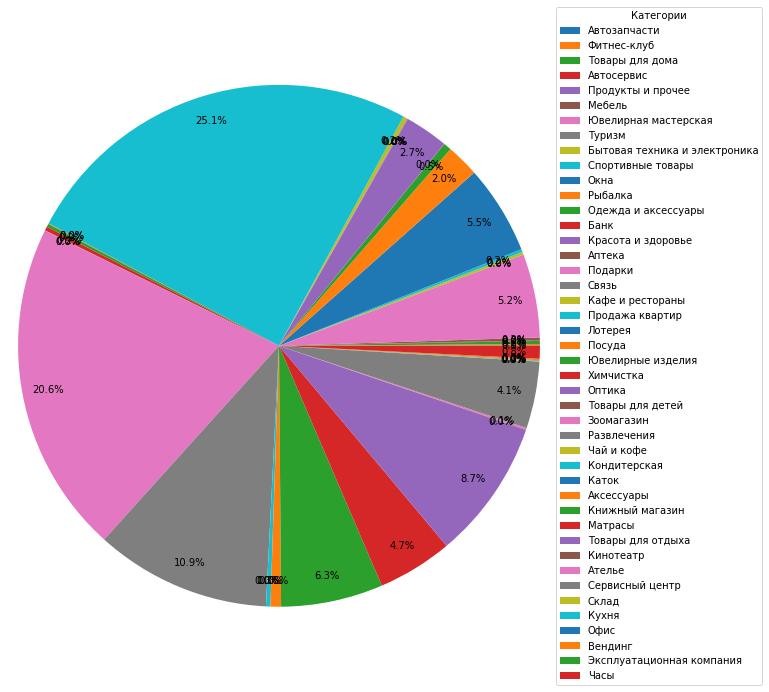

In [14]:
# Создаем области рисунка: 1-ая область - сам рисунок
# 2-ая это спецификация к рисунку с указанием соотношение цвета и названия

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))

 
wedges, texts, autotexts = ax.pie(df.groupby('Категория').sum(), autopct= '%1.1f%%',
                                  textprops=dict(color="k"), radius=1.2, pctdistance = 0.9)

ax.legend(wedges, df.Категория.unique(),
          title="Категории",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
plt.show()